In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
size = 1000000
x = np.random.rand(size)
y = np.random.rand(size)
position = list(range(int(size/2))) + list(range(int(size/2)))
chromosome = (['chr1'] * int(size/2)) + (['chr2'] * int(size/2))

array = np.vstack([x,y]).T
df = pd.DataFrame({'chromosome': chromosome, 'position': position, 'x': x, 'y':y})

In [3]:
filter_times = []
for i in range(100):
    start = time.time()
    df[(df['chromosome'] == 'chr1') & (df['position'] > 1000) & (df['position'] < 1100)]
    end = time.time()
    total = end - start
    filter_times.append(total * 1000)

In [4]:
df.set_index(['chromosome', 'position'], inplace = True)

In [5]:
index_times = []
for i in range(100):
    start = time.time()
    df.loc['chr1', 1000:1100, :]
    end = time.time()
    total = end - start
    index_times .append(total)
index_times = np.array(index_times)

In [6]:
iloc_times = []
for i in range(100):
    start = time.time()
    df.iloc[1000:1100]
    end = time.time()
    total = end - start
    iloc_times .append(total * 1000000)
iloc_times = np.array(iloc_times)

In [14]:
numpy_times = []
for i in range(100):
    start = time.time_ns()
    array[1000:1100]
    end = time.time_ns()
    total = end - start
    numpy_times.append(total)
numpy_times = np.array(numpy_times)

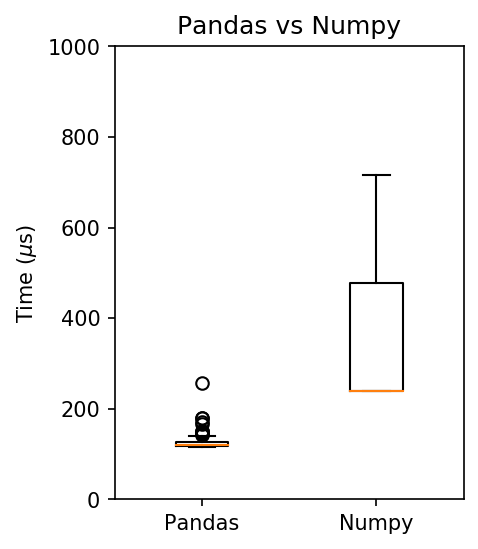

In [8]:
plt.figure(figsize = (3,4), dpi = 150)
plt.boxplot([iloc_times, numpy_times], labels = ['Pandas', 'Numpy'], widths = 0.3)
plt.ylim([0, 1000])
plt.ylabel(r'Time ($\mu$s)')
plt.title('Pandas vs Numpy')
plt.show()

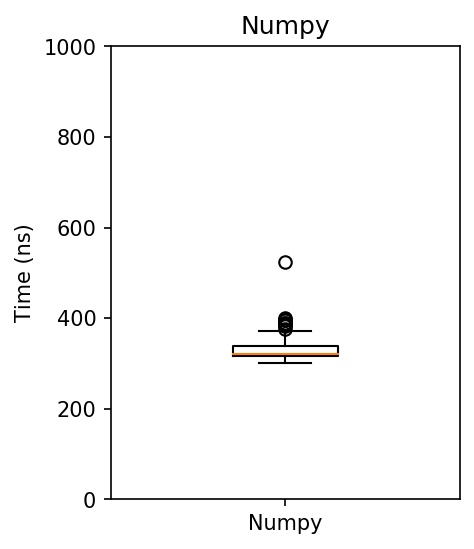

In [15]:
plt.figure(figsize = (3,4), dpi = 150)
plt.boxplot([numpy_times], labels = ['Numpy'], widths = 0.3)
plt.ylim([0, 1000])
plt.ylabel('Time (ns)')
plt.title('Numpy')
plt.show()

In [13]:
numpy_times

array([6436,  470,  353,  405,  318,  357,  362,  317,  315,  316,  316,
        301,  342,  312,  365,  328,  364,  380,  302,  366,  383,  325,
        317,  317,  312,  314,  347,  318,  327,  365,  318,  363,  377,
        325,  349,  325,  345,  317,  304,  304,  343,  301,  317,  315,
        315,  330,  317,  342,  317,  318,  344,  319,  314, 6399,  405,
        321,  317,  320,  334,  365,  321,  340,  300,  315,  315,  317,
        330,  317,  319,  443,  316,  329,  317,  350,  318,  317,  326,
        316,  302,  314,  317,  321,  346,  319,  369,  315,  302,  315,
        388,  338,  321,  321,  407,  361,  317,  317,  318,  321,  317,
        331,  317,  317,  303,  316,  317,  317,  328,  318,  301,  315,
        317,  328,  319,  319,  318,  300,  329,  314,  315,  320,  316,
        329,  315,  318,  320,  317,  331,  323,  315,  313,  317,  314,
        327,  315,  303,  316,  319,  329,  317,  319,  316,  302,  324,
        317,  316,  314,  315,  314,  317,  333,  3